# EDA - Tech Moms Application Data

This notebook performs exploratory data analytics on the Tech-Moms application dataset to understand applicant demographics, program trends, and factors influencing acceptance.

# 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
# Set the style for our visualizations
plt.style.use('seaborn-v0_8-whitegrid') #Use seaborn's whitegrid style for cleaner visualizations
sns.set_palette("viridis") # Use viridis color palette for better accesibility and easthetics
plt.rcParams['figure.figsize'] = (14, 8) # Set default figure size for better readability

In [6]:
df = pd.read_csv('Tech Moms Application Data ANON 8.29.2024.csv')

In [7]:
# Import regex module for better string handling
import re

In [8]:
# Create a more robust column renaming strategy
# This makes column names more Python-friendly (lowercase, no spaces, consistent format)
column_mapping = {
    'Contact ID': 'contact_id',
    'Cohort': 'cohort',
    'Applicant Status': 'applicant_status',
    'Children': 'children',
    'Computer Availability': 'computer_availability',
    'Employment Status': 'employment_status',
    'Salary Range': 'salary_range',
    'Relationship & Marital Status': 'relationship_and_marital_status',
    'Household Income': 'household_income',
    'Education Level': 'education_level',
    'Do you identify as LGBTQI?': 'lgbtqi_identity',
    'I am a Veteran of the U.S. Military': 'veteran_status',
    'Race / Ethnicity': 'race_ethnicity',
    'Create Date': 'create_date'
}

In [9]:
# Rename columns using the mapping
df = df.rename(columns=column_mapping)

In [11]:
# Display basic information about the dataset
print(f"\nDataset dimensions: {df.shape}") # Shows number of rows and columns
print("\nFirst few rows of the dataset:")
df.head() # Let's make sense of the data structure


Dataset dimensions: (1732, 14)

First few rows of the dataset:


,contact_id,cohort,applicant_status,children,computer_availability,employment_status,salary_range,relationship_and_marital_status,household_income,education_level,lgbtqi_identity,veteran_status,race_ethnicity,create_date
0,1,Dead Lead,Declined Attending,3.0,I do not own a laptop,NaN,NaN,Married,$50k - $75k,Bachelor's Degree,NaN,NaN,White,11/25/2020 9:20 AM
1,2,Dead Lead,Dead lead,2.0,Laptop (Mac),Employed full-time (35 hrs+),$25K-$35K,Single,$25k - $35k,Bachelor's Degree,NaN,NaN,White,11/25/2020 9:20 AM
2,3,Dead Lead,Declined Attending,3.0,Laptop (PC),Employed almost full-time (up to 35 hrs),$15K-$25K,Married,$100k - $150k,Bachelor's Degree,NaN,NaN,White,11/25/2020 9:20 AM
3,4,2020 Fall - Lehi,Assigned Cohort,1.0,Laptop (PC),Employed full-time (35 hrs+),$25K-$35K,Married,$50k - $75k,Associates Degree,NaN,NaN,Hispanic or Latina,11/25/2020 9:20 AM
4,5,Dead Lead,Dead lead,NaN,Laptop (PC),NaN,NaN,Domestic Partnership,<$15k,Bachelor's Degree,NaN,NaN,White,11/25/2020 9:20 AM


In [12]:
# Display column names in an easy-to-read format for reference
print("Column names have been changed to:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Column names have been changed to:
1. contact_id
2. cohort
3. applicant_status
4. children
5. computer_availability
6. employment_status
7. salary_range
8. relationship_and_marital_status
9. household_income
10. education_level
11. lgbtqi_identity
12. veteran_status
13. race_ethnicity
14. create_date


In [13]:
# Check for missing values to identify data quality issues and determine handling strategy
print("\nMissing values in each column:")
missing_values = df.isnull().sum() # Count nulls in each column
missing_percent = (df.isnull().sum() / len(df)) * 100 # Calculate percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df.sort_values(by='Missing Values', ascending=False) # Sort by most missing
missing_df


Missing values in each column:


,Missing Values,Percentage
veteran_status,1708,98.614319
lgbtqi_identity,1636,94.457275
computer_availability,106,6.120092
employment_status,70,4.041570
race_ethnicity,50,2.886836
salary_range,43,2.482679
children,28,1.616628
cohort,3,0.173210
applicant_status,3,0.173210
contact_id,0,0.000000


**Note**: The columns with highest missing values are 'I am a Veteran of the U.S. Military' and
'Do you identify as LGBTQI?', which might indicate optional fields that many applicants chose not to answer


In [14]:
# Check data types to understand how pandas interpreted each column
print("\nData types for each column:")
df.dtypes


Data types for each column:


,0
contact_id,int64
cohort,object
applicant_status,object
children,float64
computer_availability,object
employment_status,object
salary_range,object
relationship_and_marital_status,object
household_income,object
education_level,object


# 2. Data Cleaning
Performing basic data cleaning before deeper analysis

In [15]:
# Convert 'create_date' to datetime format for proper analysis
df['create_date'] = pd.to_datetime(df['create_date'], errors='coerce')

In [17]:
# Extract year from create_date for trend analysis
df['year'] = df['create_date'].dt.year # Create year feature for time-based analysis

In [18]:
# Replace empty strings with NaN for consistency in missing value handling
df = df.replace('', np.nan) # This standardizes how missing values are represented

In [19]:
# Generate basic statistics for numeric fields to understand distributions
print("\nSummary statistics for numeric columns:")
df.describe(include='all') # 'include='all'' ensures we get stats for non-numeric columns too


Summary statistics for numeric columns:


,contact_id,cohort,applicant_status,children,computer_availability,employment_status,salary_range,relationship_and_marital_status,household_income,education_level,lgbtqi_identity,veteran_status,race_ethnicity,create_date,year
count,1732.000000,1729,1729,1704.000000,1626,1662,1689,1732,1732,1732,96,24,1682,1732,1732.000000
unique,NaN,49,9,NaN,3,4,8,6,10,7,1,1,37,NaN,NaN
top,NaN,Dead Lead,Assigned Cohort,NaN,Laptop (PC),"No, currently not employed outside the home",I do not currently work outside the home.,Married,$50k - $75k,Bachelor's Degree,checked,checked,White,NaN,NaN
freq,NaN,839,567,NaN,839,626,626,979,331,529,96,24,927,NaN,NaN
mean,902.104503,NaN,NaN,2.340962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:15:09.803695104,2022.312356
min,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-25 09:20:00,2020.000000
25%,436.750000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-05 19:53:45,2021.000000
50%,898.500000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-28 11:36:30,2022.000000
75%,1368.250000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-27 01:56:15,2023.000000
max,1820.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-28 13:46:00,2024.000000


Note: The median number of children is 2, and most applicants have between 1-3 children

# 3. Exploratory Data Analysis
Now we'll explore different aspects of the data through visualizations

## 3.1 Distribution of Applicant Status

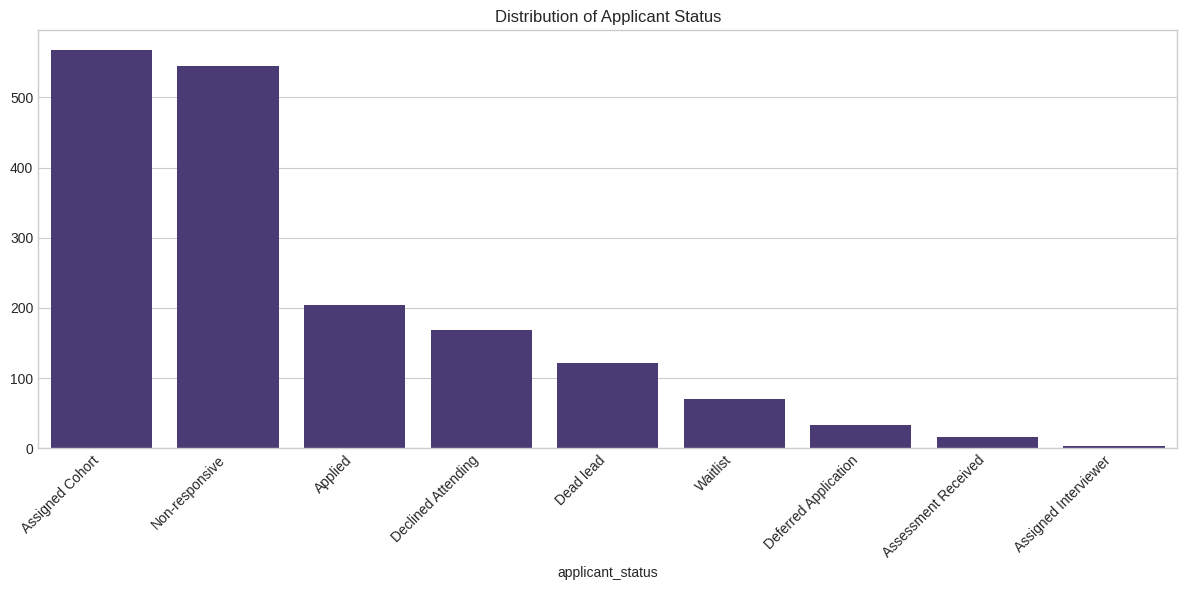

In [20]:
## Analyzing the status of applications to understand program pipeline
plt.figure(figsize=(12, 6))
status_counts = df['applicant_status'].value_counts() # Count each status category
sns.barplot(x=status_counts.index, y=status_counts.values) # Create bar chart
plt.xticks(rotation=45, ha='right') # Rotate x-labels for better readability
plt.title('Distribution of Applicant Status')
plt.tight_layout() # Prevent label cutting
plt.show()

Note: A significant portion of applicants are labeled as "Dead lead" or "Non-responsive", which suggests there might be opportunities to improve follow-up processes

## 3.2 Number of Children Distribution

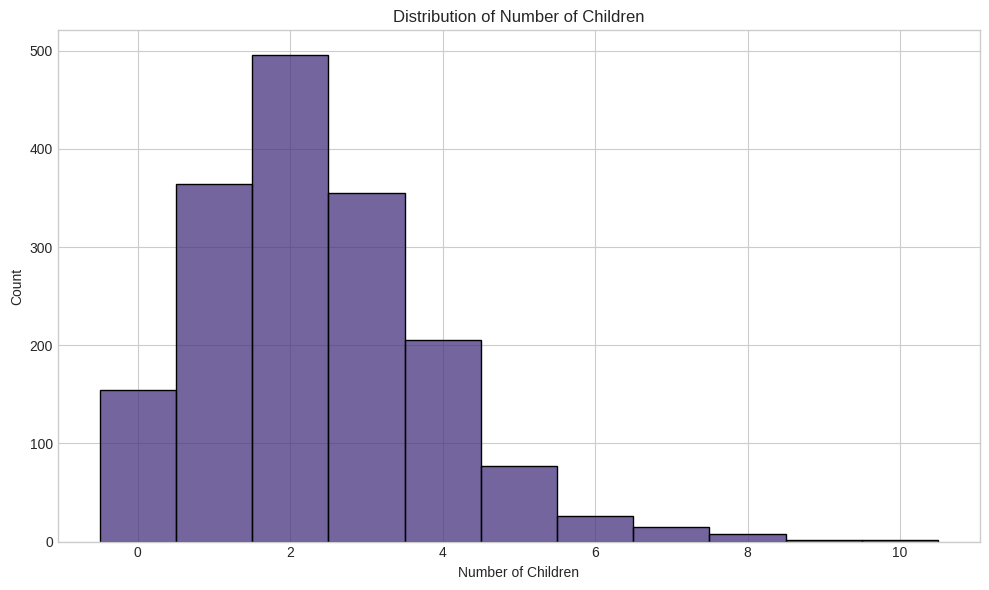

In [21]:
## Understanding family size of applicants
plt.figure(figsize=(10, 6))
sns.histplot(df['children'].dropna(), discrete=True, kde=False) # Histogram for count data
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Note: Most applicants have between 1-3 children, with 2 being the most common.
This suggests that the program is attracting primarily mothers with young families.

## 3.3 Education Level Analysis

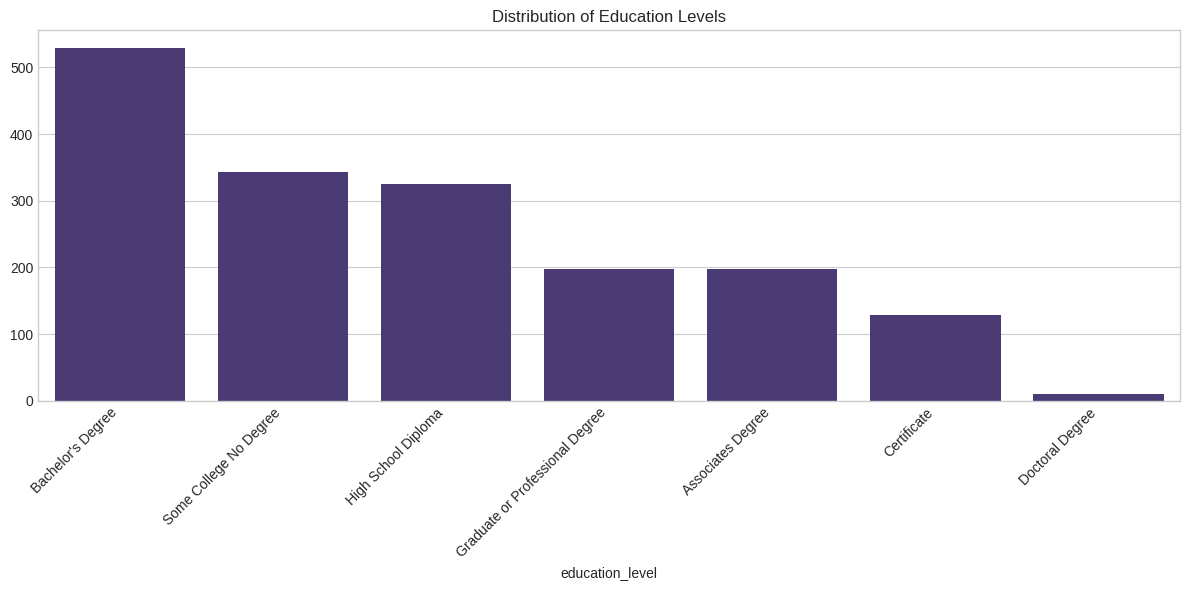

In [23]:
## Examining educational background of applicants
plt.figure(figsize=(12, 6))
education_counts = df['education_level'].value_counts() # Count by education level
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Education Levels')
plt.tight_layout()
plt.show()

Note: The most common education level is Bachelor's Degree, followed by Some College No Degreeand High School Diploma. This suggests the program is attracting educated women who may be looking to transition careers or return to the workforce.

## 3.4 Employment Status

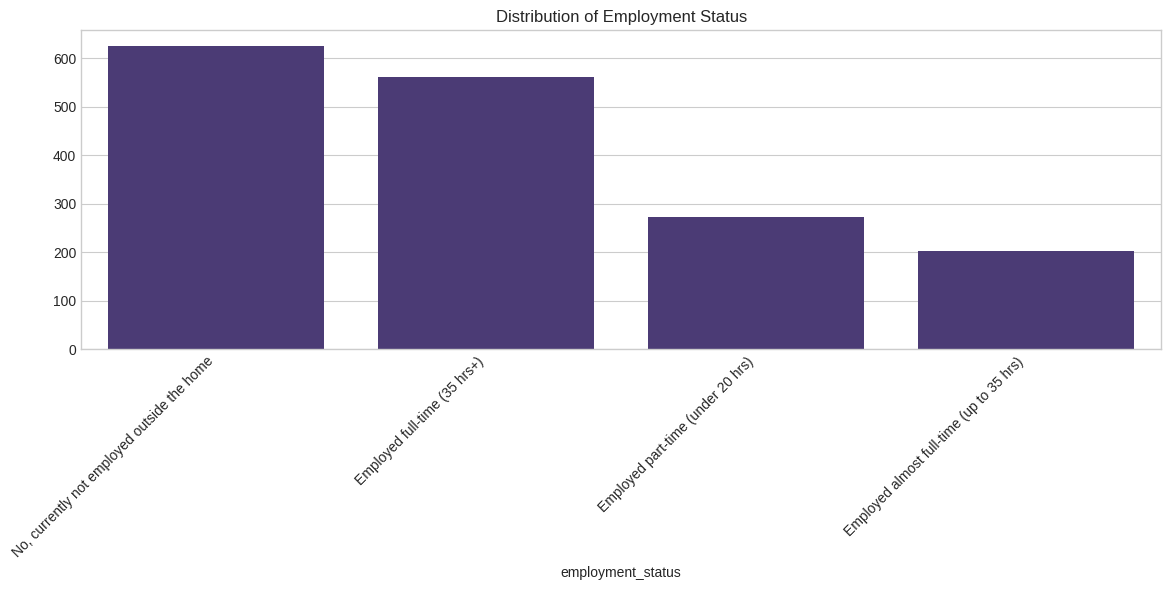

In [24]:
## Understanding current employment situation of applicants
plt.figure(figsize=(12, 6))
employment_counts = df['employment_status'].value_counts()
sns.barplot(x=employment_counts.index, y=employment_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Employment Status')
plt.tight_layout()
plt.show()

Note: A significant number of applicants are employed full-time, suggesting they may be seeking to transition careers rather than enter the workforce for the first time.

## 3.5 Computer Availability

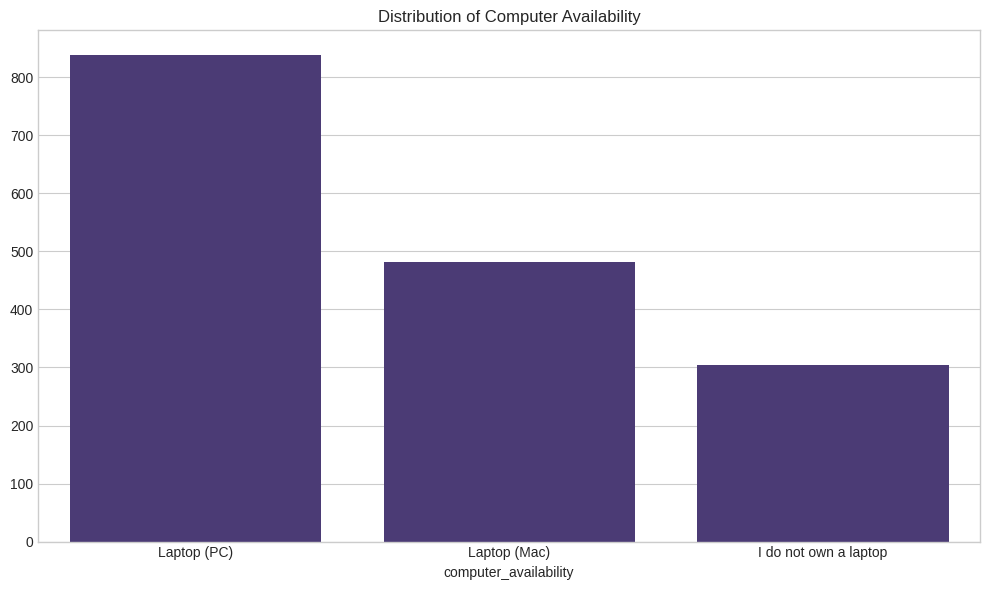

In [25]:
## Assessing access to technology, which could be a participation barrier
plt.figure(figsize=(10, 6))
computer_counts = df['computer_availability'].value_counts()
sns.barplot(x=computer_counts.index, y=computer_counts.values)
plt.title('Distribution of Computer Availability')
plt.tight_layout()
plt.show()

Note: Most applicants have access to a laptop (either PC or Mac), but there are still some who do not own a laptop, which could be a barrier to participation.

## 3.6 Applications Over Time

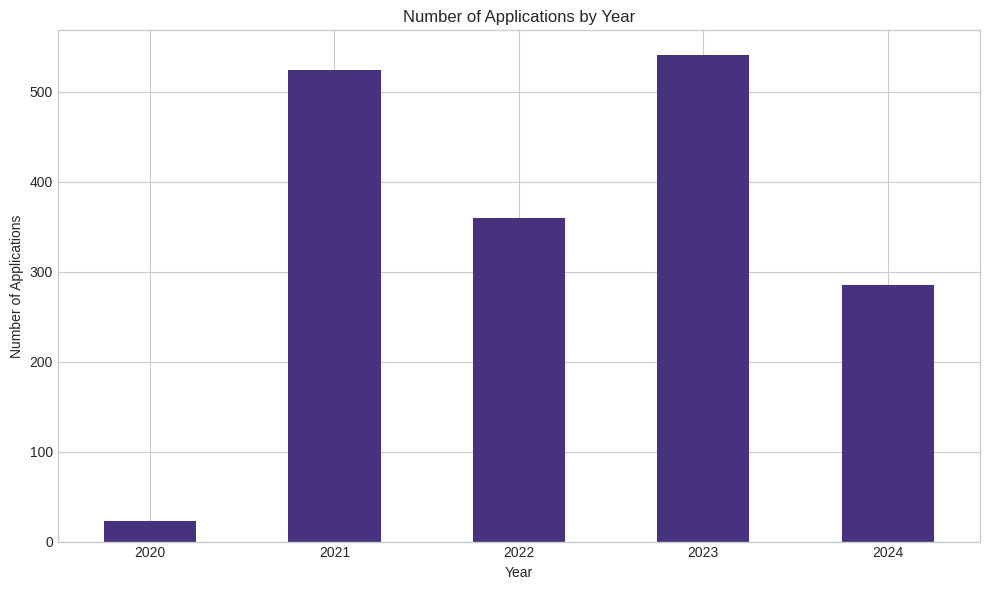

In [26]:
## Analyzing application trends over year
# Group by year and count applications per year
yearly_apps = df.groupby('year').size()
plt.figure(figsize=(10, 6))
yearly_apps.plot(kind='bar')
plt.title('Number of Applications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Note: There appears to be variability in application numbers by year. 2021 and 2023 had the highest numbers, while 2024 is still in progress.

## 3.7 Acceptance Rate Analysis

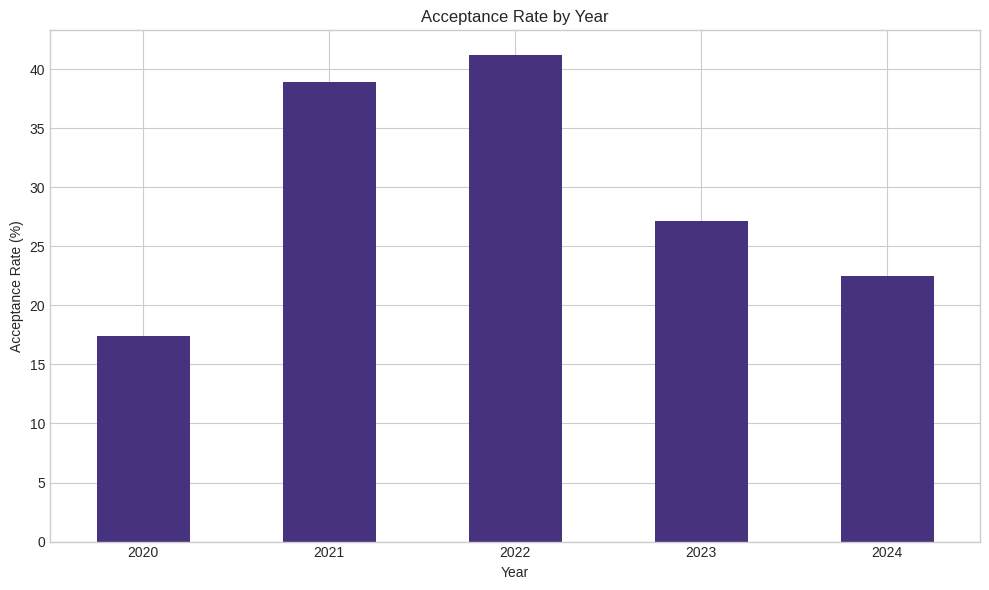

In [27]:
## Calculating the percentage of applicants who were assigned to a cohort each year
acceptance_rate = df.groupby('year')['applicant_status'].apply(
    lambda x: (x == 'Assigned Cohort').sum() / len(x) * 100 # Calculate % of accepted applicants
)
plt.figure(figsize=(10, 6))
acceptance_rate.plot(kind='bar')
plt.title('Acceptance Rate by Year')
plt.xlabel('Year')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Note: The acceptance rate varies by year, which might indicate changes in program capacity, application quality, or selection criteria.

## 3.8 Education Level vs. Applicant Status

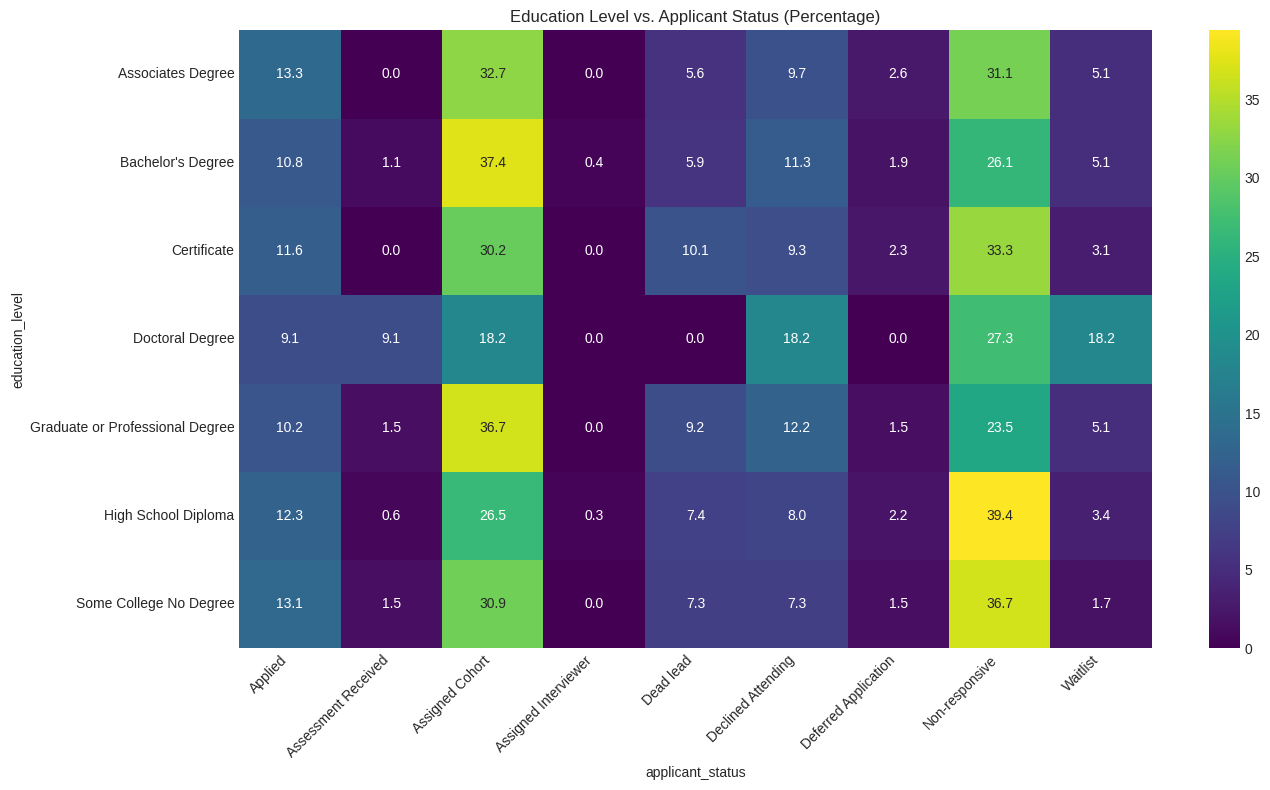

In [28]:
## Creating a heatmap to show relationship between education and application outcome
education_status = pd.crosstab(df['education_level'], df['applicant_status'], normalize='index') * 100 # Normalize by row (%)
plt.figure(figsize=(14, 8))
sns.heatmap(education_status, annot=True, cmap='viridis', fmt='.1f') # Show percentages in cells
plt.title('Education Level vs. Applicant Status (Percentage)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Note: This heatmap shows the relationship between education level and application outcome. Interesting to see if certain education levels have higher acceptance rates.

## 3.9 Race/Ethnicity Distribution

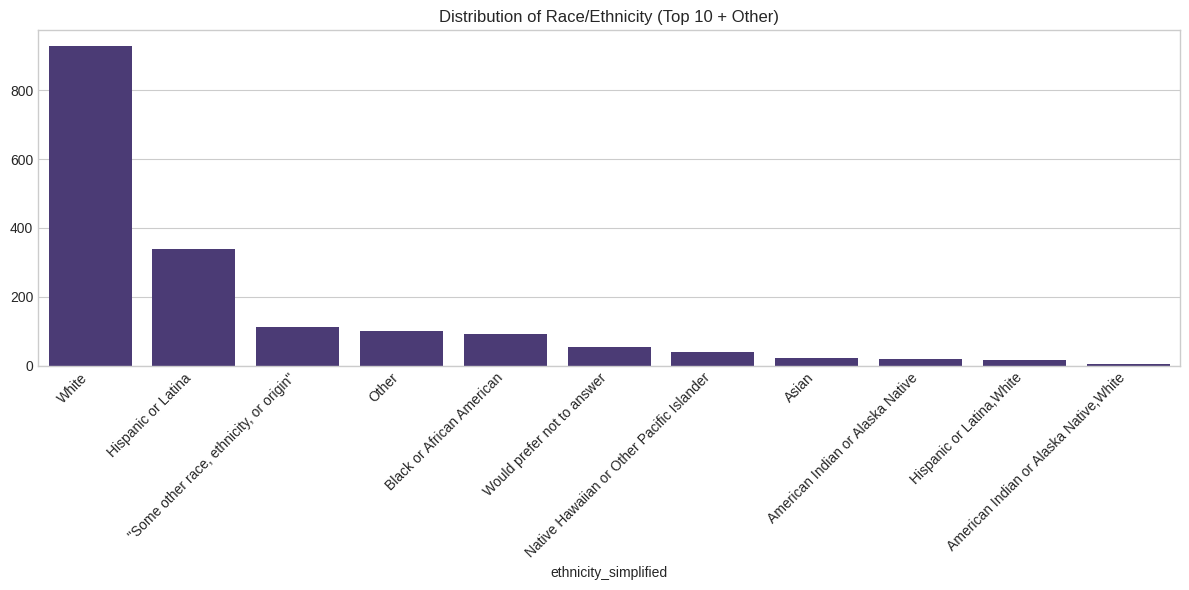

In [29]:
# Simplify race/ethnicity distribution
# Since there are many combinations, we'll extract the most common categories
top_ethnicities = df['race_ethnicity'].value_counts().head(10).index # Get top 10 most common ehtnicities
df['ethnicity_simplified'] = df['race_ethnicity'].apply(
    lambda x: x if x in top_ethnicities else 'Other') # Group less common ehtnicities as "Other"

plt.figure(figsize=(12, 6))
ethnicity_counts = df['ethnicity_simplified'].value_counts()
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Race/Ethnicity (Top 10 + Other)')
plt.tight_layout()
plt.show()

Note: The racial/ethnic distribution shows which communities the program is reaching. This can help identify potential outreach opportunities to diversify the applicant pool.

## 3.10 Household Income Distribution

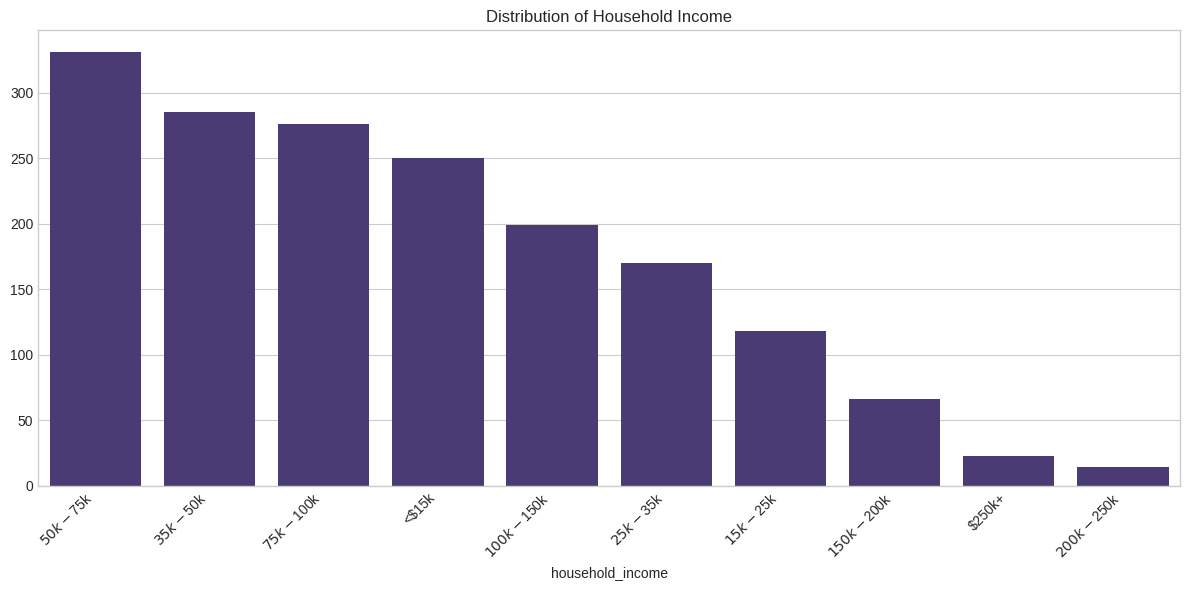

In [30]:
## Analyzing economic backgrounds of applicants
plt.figure(figsize=(12, 6))
income_counts = df['household_income'].value_counts()
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Household Income')
plt.tight_layout()
plt.show()

Note: Household income distribution provides insights about the economic backgrounds of applicants. Many seem to be from middle-income households.

## 3.11 Relationship between Education and Computer Availability

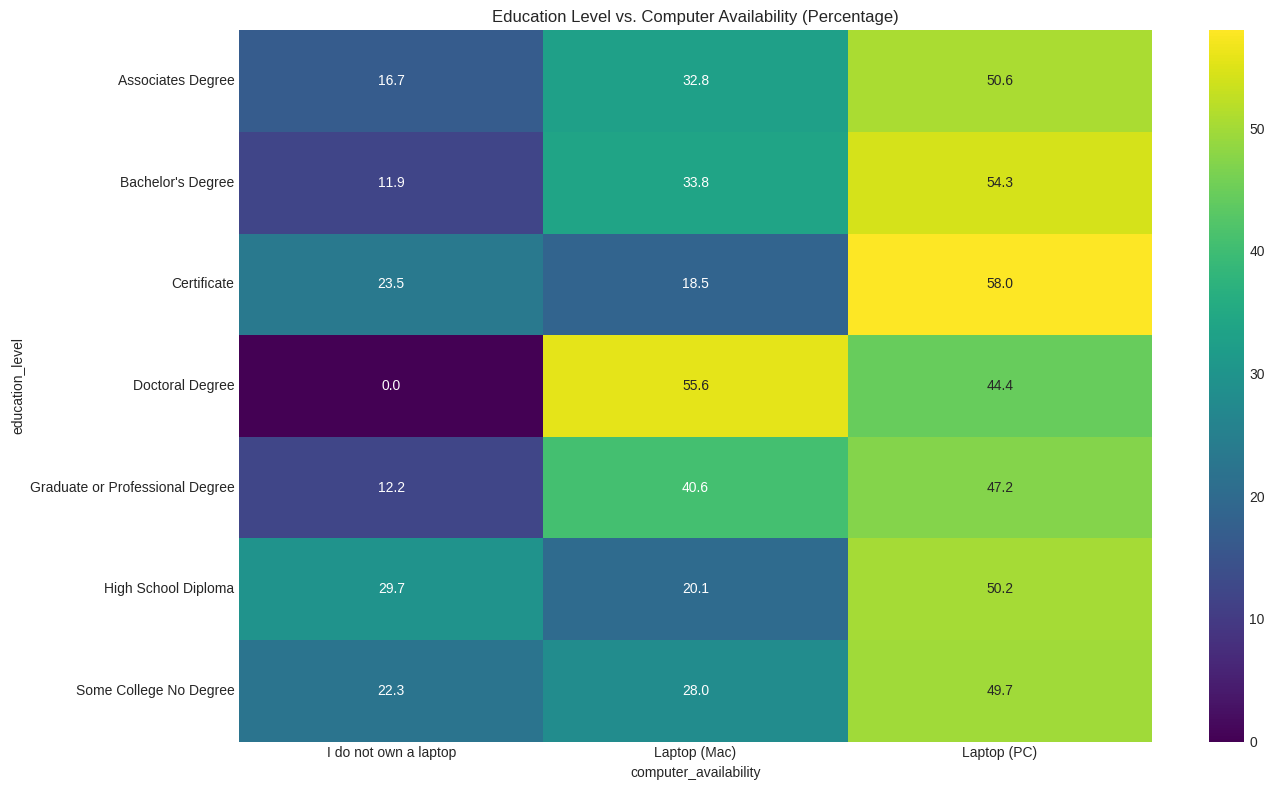

In [31]:
## Exploring if education level correlates with computer access
edu_computer = pd.crosstab(df['education_level'], df['computer_availability'], normalize='index') * 100 # Row percentages
plt.figure(figsize=(14, 8))
sns.heatmap(edu_computer, annot=True, cmap='viridis', fmt='.1f') # Show percentages in cells
plt.title('Education Level vs. Computer Availability (Percentage)')
plt.tight_layout()
plt.show()

Note: This visualization shows how computer availability varies by education level. Interesting to see if higher education correlates with greater computer access.

## 3.12 Analysis of top cohorts

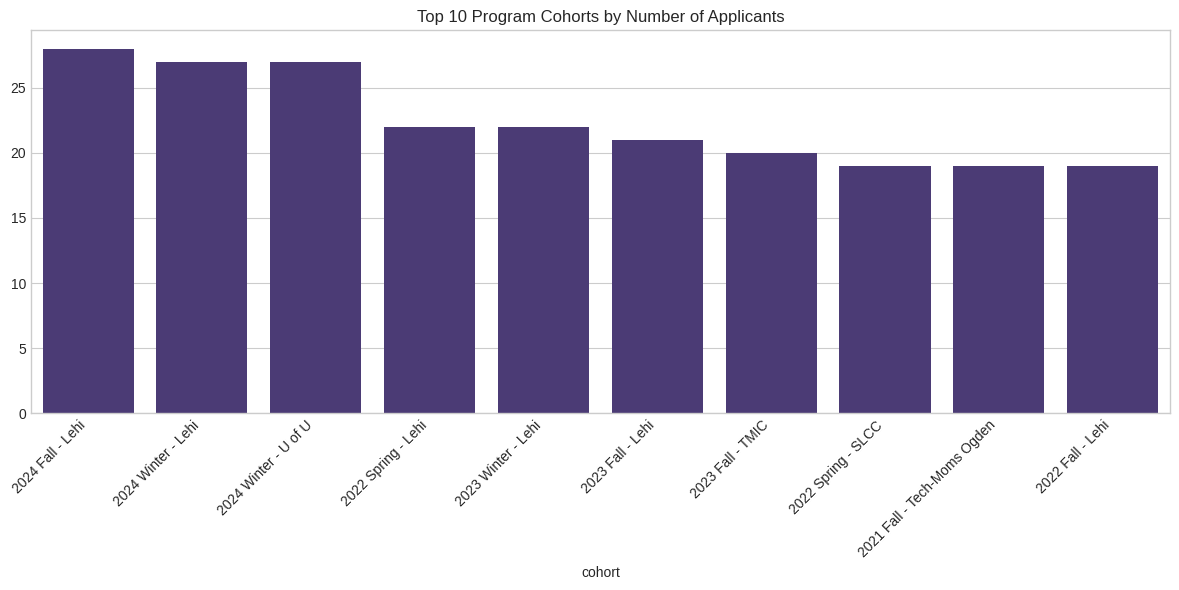

In [34]:
## Examining which cohorts have the most applicants
# Filter out categories that aren't actual program cohorts
cohorts_to_exclude = ["Dead Lead", "Applicant", "Waitlist - Online", "Waitlist - Salt Lake","Passed Assessment"]
filtered_cohorts = df[~df['cohort'].isin(cohorts_to_exclude)]  # Use boolean mask to exclude unwanted cohorts

# Get top 10 actual program cohorts by number of applicants
top_cohorts = filtered_cohorts['cohort'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cohorts.index, y=top_cohorts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Program Cohorts by Number of Applicants')
plt.tight_layout()
plt.show()

Note: This analysis focuses on actual program cohorts, filtering out categories like 'Dead Lead' and waitlists to better understand the distribution of participants across real program cohorts.

## 3.13 Additional Analyses

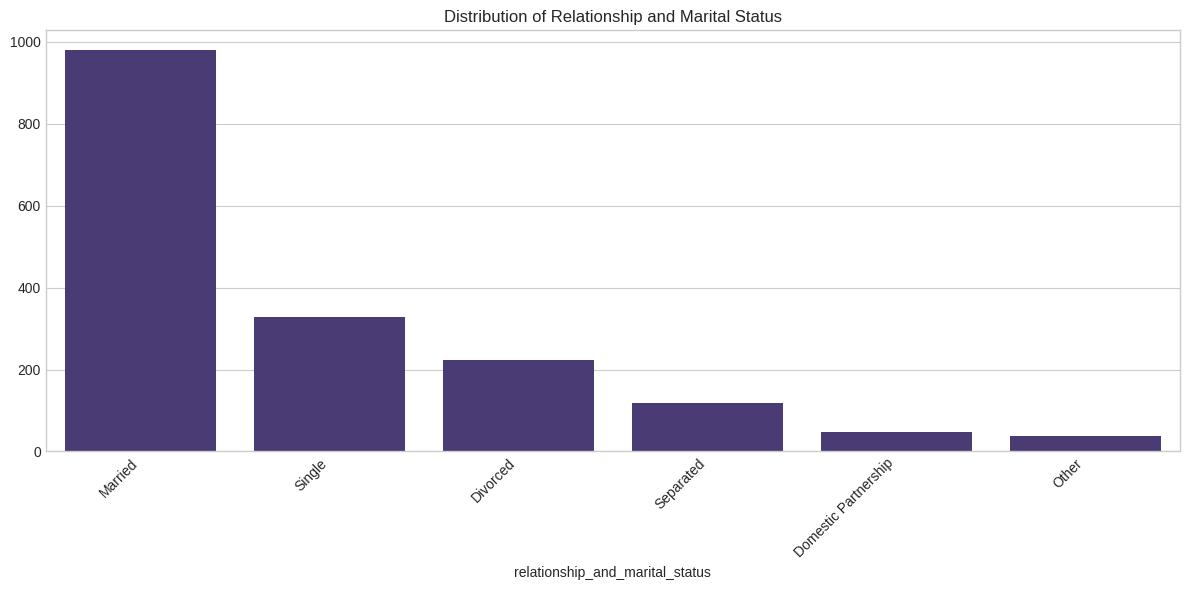

In [35]:
# Further exploration of potentially important factors

# Relationship Status Distribution
# Understanding family structure of applicants
plt.figure(figsize=(12, 6))
relationship_counts = df['relationship_and_marital_status'].value_counts()
sns.barplot(x=relationship_counts.index, y=relationship_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Relationship and Marital Status')
plt.tight_layout()
plt.show()

Note: Understanding family structure can provide insight into support needs and potential scheduling considerations for the program.

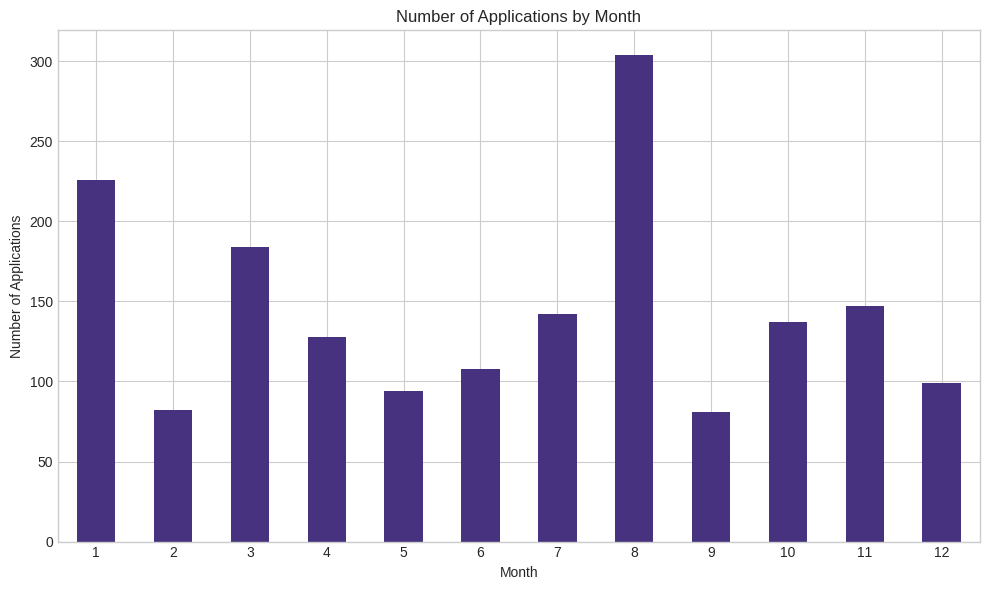

In [36]:
# Create month feature for seasonal analysis
df['month'] = df['create_date'].dt.month  # Extract month from datetime for seasonal patterns

# Applications by Month (Seasonality)
# Analyzing if applications have seasonal patterns
monthly_apps = df.groupby('month').size()  # Count applications by month
plt.figure(figsize=(10, 6))
monthly_apps.plot(kind='bar')
plt.title('Number of Applications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Note: Application volume may have seasonal patterns that could inform recruitment timing and resource allocation.

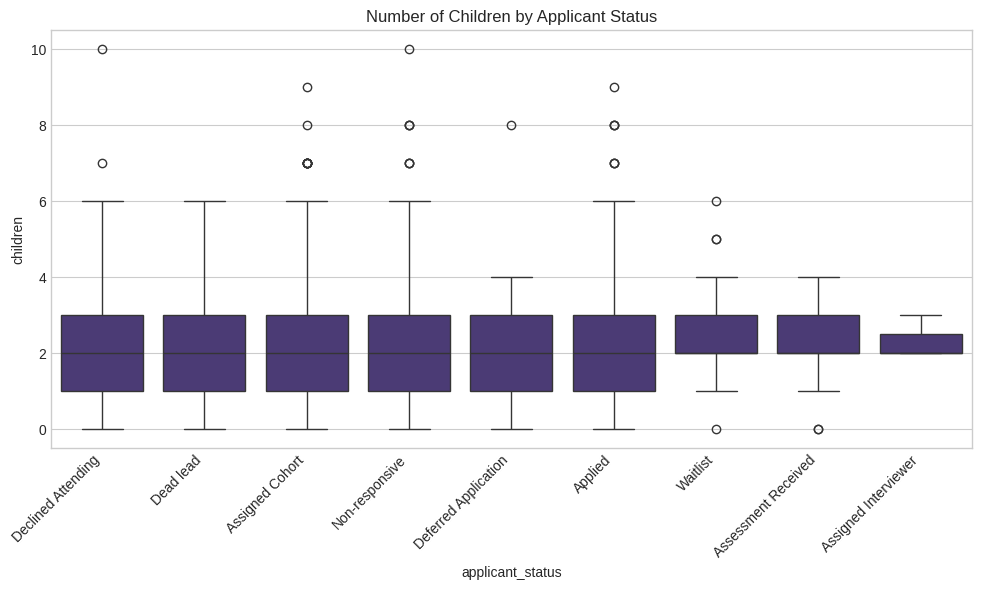

In [37]:
# Correlation between number of children and acceptance
# Examining if family size relates to program acceptance
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['applicant_status'], y=df['children'])  # Box plot shows distribution by group
plt.title('Number of Children by Applicant Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Note: Analyzing if family size has any relationship with program acceptance can help understand selection patterns.

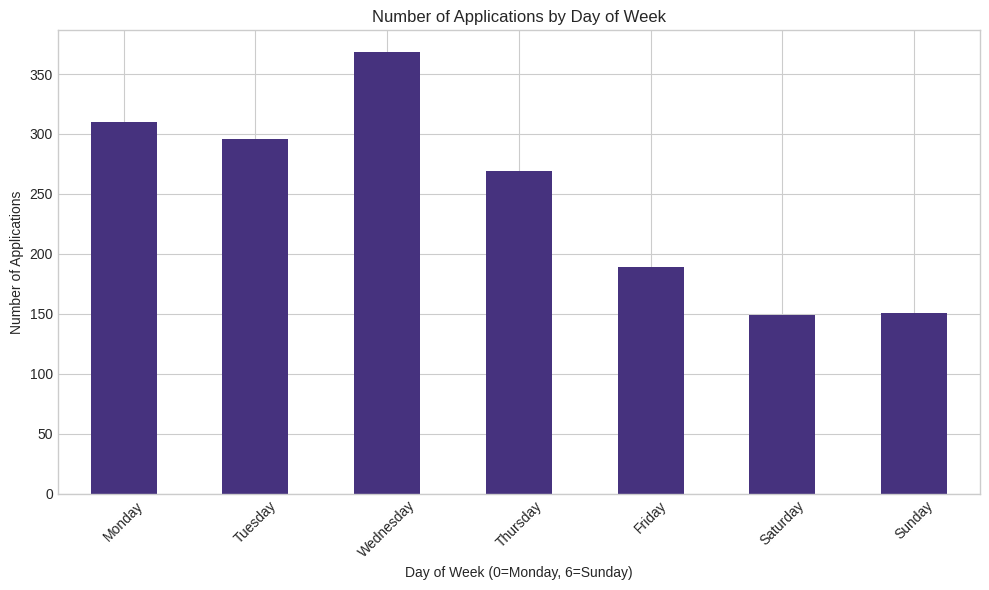

In [38]:
# Analysis of application volume by day of week
# Understanding what days applicants typically submit applications
df['weekday'] = df['create_date'].dt.dayofweek  # 0=Monday, 6=Sunday
weekday_apps = df.groupby('weekday').size()  # Count applications by day of week
plt.figure(figsize=(10, 6))
weekday_apps.plot(kind='bar')
plt.title('Number of Applications by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.tight_layout()
plt.show()

Note: Understanding when applicants are most likely to apply could help optimize support staff availability and outreach timing.

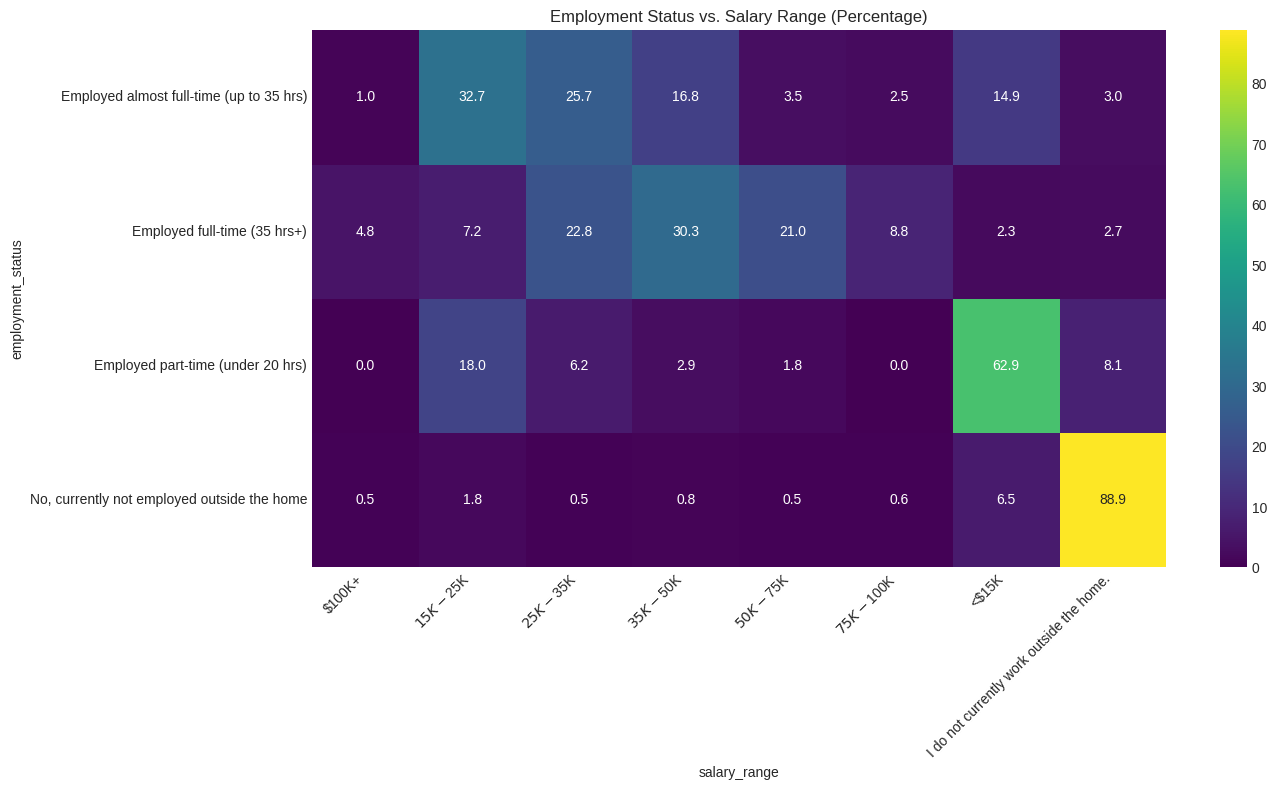

In [39]:
## Relationship between Employment Status and Salary Range
employment_salary = pd.crosstab(df['employment_status'], df['salary_range'], normalize='index') * 100
plt.figure(figsize=(14, 8))
sns.heatmap(employment_salary, annot=True, cmap='viridis', fmt='.1f')
plt.title('Employment Status vs. Salary Range (Percentage)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Note: This shows how salary varies by employment status, highlighting potential economic motivations for joining the program.

# 4. Summary of Findings

## Compiling key insights from the exploratory analysis


Key Findings from EDA:
1. Demographic Profile: Most applicants are mothers with 1-3 children, many have Bachelor's degrees, and a significant portion are employed full-time.
2. Technology Access: While most applicants have access to a laptop, there's a segment without computer access, which could impact program participation.
3. Application Process: A large number of leads are categorized as 'Dead lead' or 'Non-responsive', suggesting potential for improving the follow-up process.
4. Acceptance Patterns: Acceptance rates have varied by year, with the highest rates in 2021-2022.
5. Education Impact: There appears to be some relationship between education level and application outcome, worth exploring further.
6. Diversity Considerations: The applicant pool has a specific racial/ethnic composition that might inform outreach efforts.
7. Economic Background: Applicants come from various income levels, with many from middle-income households.
8. Application Timing: There are patterns in when applications are submitted, both seasonally and by day of week.


In [41]:
# Save the prepared dataframe for use in the preprocessing notebook
# This allows the next notebook to continue the data pipeline
df.to_csv('tech_moms_eda_cleaned.csv', index=False)
print("\nSaved cleaned data to 'tech_moms_eda_cleaned.csv' for use in the next notebook (02_Preprocessing_and_Feature_Engineering)")


Saved cleaned data to 'tech_moms_eda_cleaned.csv' for use in the next notebook (02_Preprocessing_and_Feature_Engineering)
